<a href="https://colab.research.google.com/github/gibi177/CIS--PS/blob/main/Modulo%202/Atividade%20Clustering/Atividade_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade de Clusterização

## Felipe Gibin

### 1. Observação dos dados

#### 1.1 Carrega o dataset

In [32]:
import pandas as pd

#Carregar o dataset, que usa ; como delimitador
df = pd.read_csv('student_habits_performance.csv')

#Remove coluna 'student_id'
df = df.drop('student_id', axis=1)

#Visualizar primeiras linhas
df.head()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


#### 1.2 Hipóteses

Apenas observando os dados da tabela, e usando a intuição, vamos levantar algumas hipóteses.

1) Há uma relação entre exercise_frequency e mental_health_rating, onde ambas contribuem para o desempenho acadêmico.

2) Estudantes com horas de sono adequadas tendem a ter notas mais altas.

3) Estudantes com social_media_hours e netflix_hours altas tendem a ter notas mais baixas.

4) Estudantes com study_hours_per_day e attendance_percentage altos tendem a ter notas mais altas.

### 2. Análise exploratória de dados (EDA)

#### 2.1 Análise inicial

In [33]:
# Análise inicial
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

#### 2.2 Trata valores faltantes

In [34]:
#Soma os valores zero e NaN por coluna
NaN_values = df.isna().sum()

Zero_values = (df == 0).sum()

# Mostrar resultado
print("Contagem NaN por coluna:")
print(NaN_values)

print("\nContagem zeros por coluna:")
print(Zero_values)

Contagem NaN por coluna:
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
parental_education_level         91
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

Contagem zeros por coluna:
age                                0
gender                             0
study_hours_per_day               13
social_media_hours                21
netflix_hours                     59
part_time_job                      0
attendance_percentage              0
sleep_hours                        0
diet_quality                       0
exercise_frequency               144
parental_education_level

Nesse caso, precisamos apenas imputar os valores NaN na coluna parental_education_level. Não vamos imputar os zeros, visto que as colunas com valores nulos correspondem a features onde esse valor é completamente normal. Já que as linhas com valores NaN correspondem à 9.1% do total de linhas do dataset, ou seja, um valor significativo, não é recomendado usar dropna(). Portanto, vamos substituir esses valores pela moda da coluna.

In [35]:
# Imputação com a moda, visto que se trata de uma feature com dados categóricos
df['parental_education_level'] = df['parental_education_level'].fillna(df['parental_education_level'].mode()[0])

#### 2.3 Distribuição dos dados numéricos

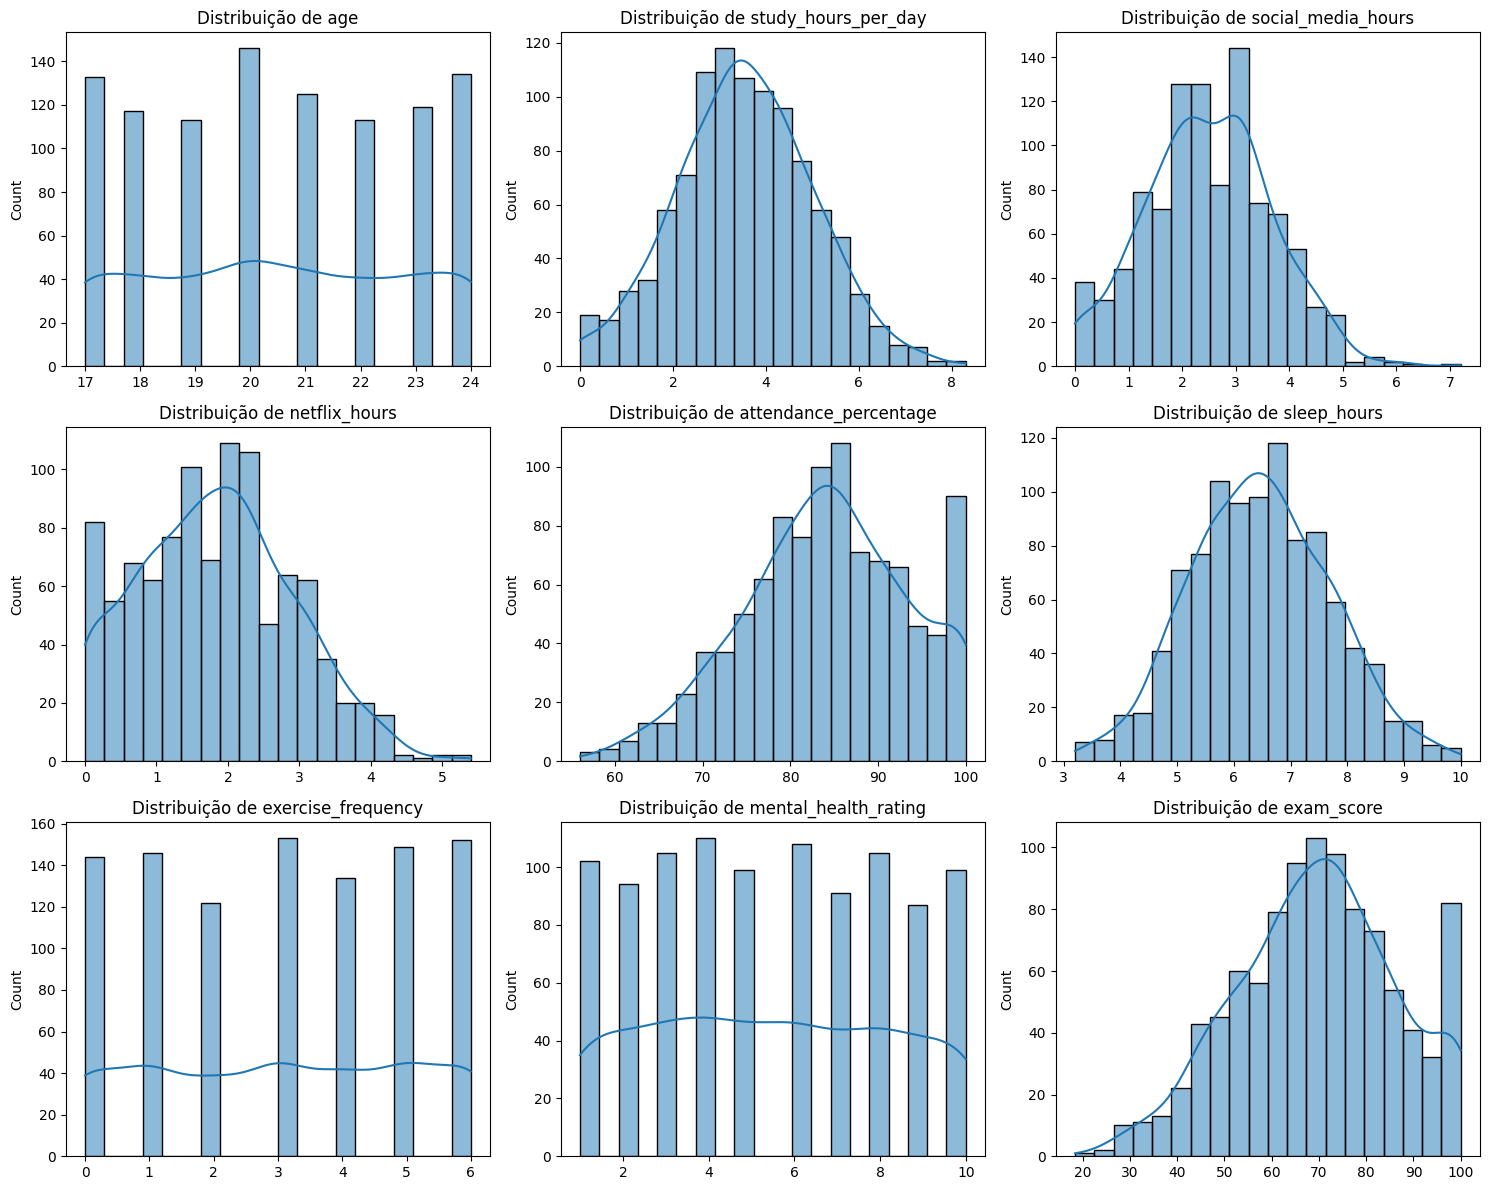

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

#Colunas dos dados numéricos
numeric_data = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(numeric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=True, bins=20)
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

#### 2.4 Distribuição dos dados categóricos


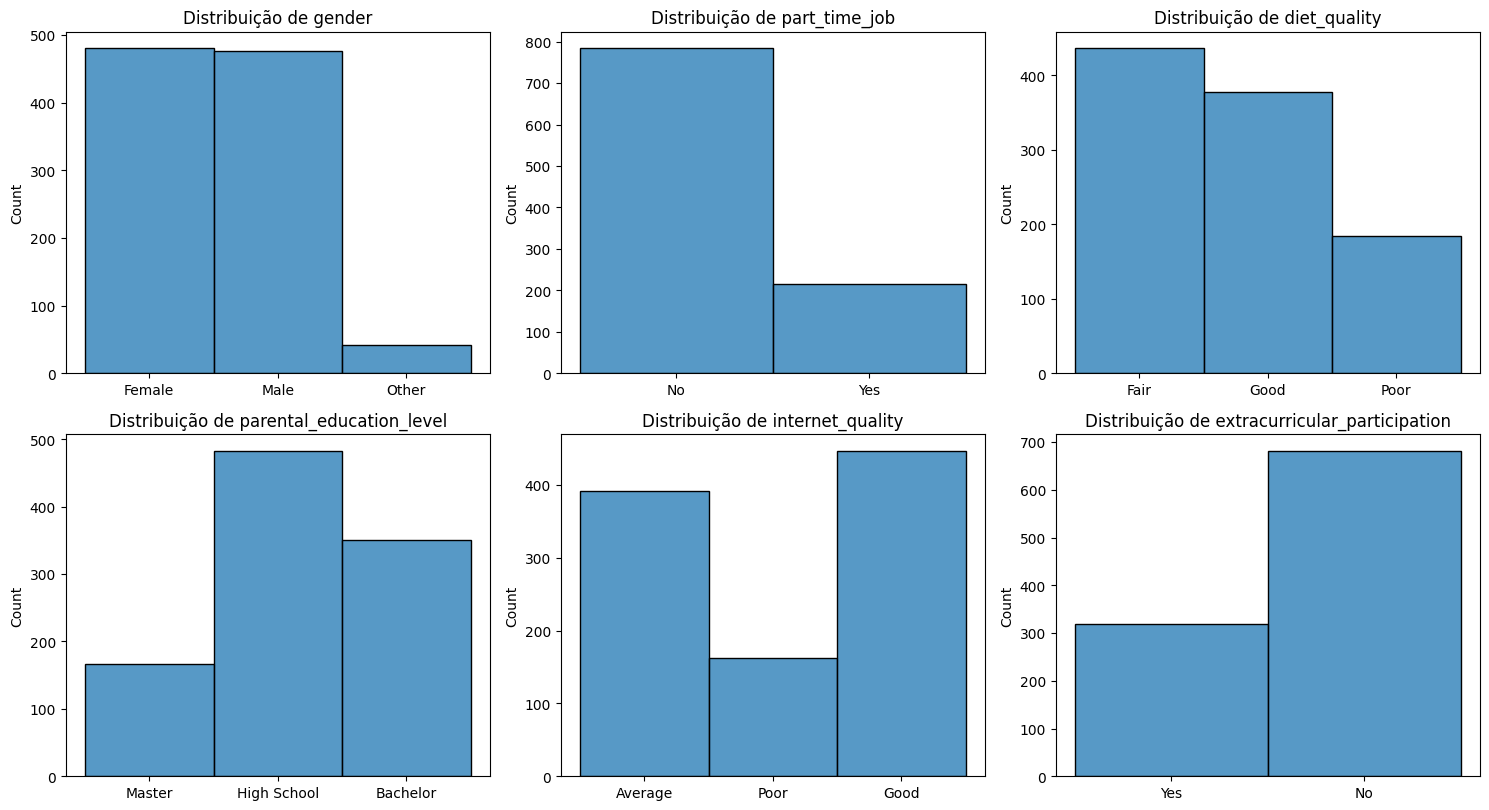

In [37]:
#Colunas dos dados categóricos
categoric_data = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(15, 12))

# Histogramas com curvas de densidade
for i, var in enumerate(categoric_data, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[var], kde=False, discrete=True)
    plt.title(f'Distribuição de {var}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

Analisando as distribuições, dou destaque à algumas observações:

1) Colunas numéricas: exam_score teve distribuição deslocada à direita, o que indica que o teste foi fácil. mental_health_rating e exercise_frequency são surpreendentemente uniformes,com representatividade bastante equilibrada entre todos os valores. social_media_hours e netflix_hours são surpreendetemente altas, considerando que uma não é contabilizada no tempo da outra, estudantes gastam tempo considerável diário nessas atividades. Levanta-se a dúvida se study_hours_per_day considera as horas de aula; caso não inclua, é um parâmetro bem elevado para essa estatística.

1) Colunas categóricas: surpreende que diet_quality seja majoritariamente classificada como "Good" ou "Average", visto que se trata de estudantes;

#### 2.5 Investigando correlações



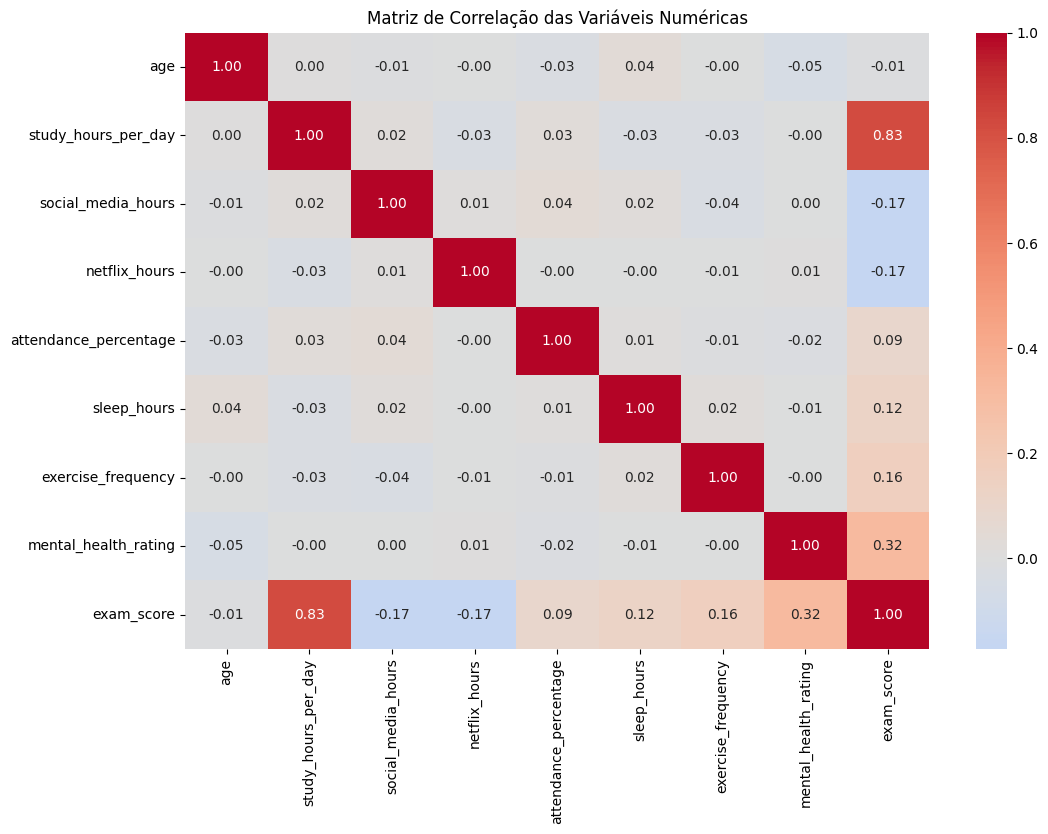

In [38]:
# Calcular a matriz de correlação
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

Observamos uma colinearidade negligenciável. As variáveis que mais impactam o rendimento acadêmico são: study_hours_per_day e mental_health_rating, que têm impacto positivo, e social_media_hours e netflix_hours, que têm impacto negativo.

#### 2.6 Visualização por scatterplot de variáveis de interesse

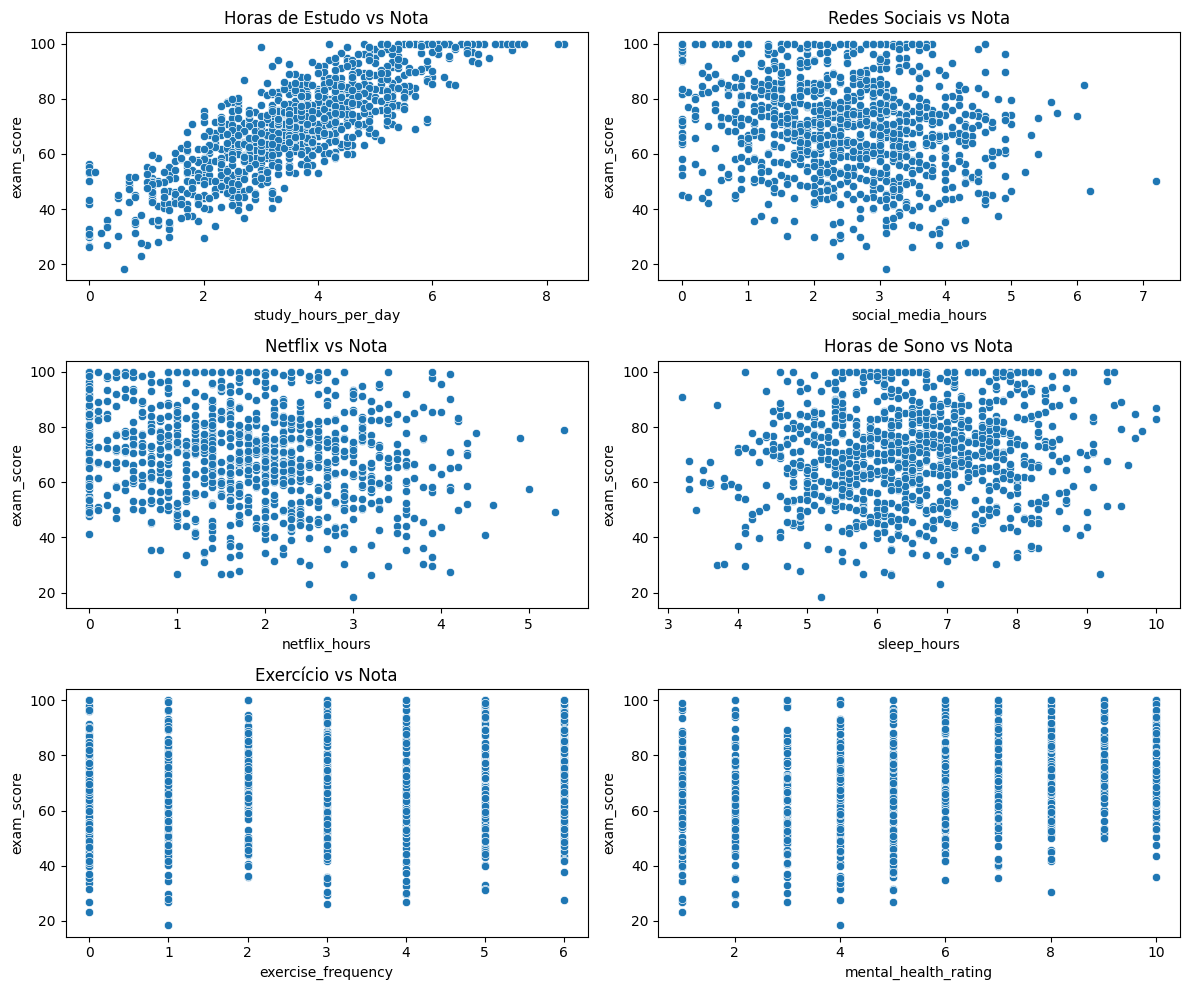

In [39]:
# Tamanho da figura para todas as imagens
plt.figure(figsize=(12, 10))

# Relação entre study_hours_per_day e exam_score
plt.subplot(3, 2, 1)
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=df)
plt.title('Horas de Estudo vs Nota')

# Relação entre social_media_hours e exam_score
plt.subplot(3, 2, 2)
sns.scatterplot(x='social_media_hours', y='exam_score', data=df)
plt.title('Redes Sociais vs Nota')

# Relação entre netflix_hours e exam_score
plt.subplot(3, 2, 3)
sns.scatterplot(x='netflix_hours', y='exam_score', data=df)
plt.title('Netflix vs Nota')

# Relação entre sleep_hours e exam_score
plt.subplot(3, 2, 4)
sns.scatterplot(x='sleep_hours', y='exam_score', data=df)
plt.title('Horas de Sono vs Nota')

# Relação entre exercise_frequency e exam_score
plt.subplot(3, 2, 5)  # Ajustado para a grade 3x2
sns.scatterplot(x='exercise_frequency', y='exam_score', data=df)
plt.title('Exercício vs Nota')

# Relação entre mental_health_rating e exam_score
plt.subplot(3, 2, 6)  # Ajustado para a grade 3x2
sns.scatterplot(x='mental_health_rating', y='exam_score', data=df)

plt.tight_layout()
plt.show()

Com excessão das horas de estudos, os outros plots não apresentam tendências visuais óbvias.

### 3. Revisão das hipóteses


Revisando as hipóteses levantadas, observamos que:

1) Parcialmente correta. Não parece haver correlação entre exercise_frequency e mental_health_rating, o que me surpreende muito. Além disso, exercise_frequency e exam_score possuem correlação de 0.16 (fraca positiva), e mental_health_rating e exam_score possuem correlação de 0.32 (média positiva). Embora ambas influenciem o desempenho acadêmico, esperava uma correlação mais forte entre elas e com a variável alvo.

2) Correta. sleep_hours e exam_score possuem correlação de 0.12 (fraca positiva). Mais uma vez, esperava uma contribuição mais forte, mas há uma relação, ainda que reduzida.

3) Correta. As correlações entre social_media_hours, netflix_hours com exam_score foram ambas consideradas fracas negativas, com -0.17 para as duas.

4) Parcialmente correta. study_hours_per_day e exam_score possuem uma correlação muito forte de 0.83, mas attendance_percentage tem uma correlação muito fraca positiva de 0.09 com exam_score.

Vale lembrar que essa reavaliação das hipóteses é baseada na matriz de correlação, que apresenta correlações simples, que podem não refletir o impacto real ou total dessas features.

### 4. Algoritmo de K-Means from scratch

O algoritmo K-means é usado em clusterização como método de divisão de n observações em k clusters diferentes. Observe que esse é um método para clusterização, ou seja, aprendizado não supervisionado em que não temos labels. Para o nosso problema, isso seria contraditório, visto que existe o label exam_score. Dessa forma, vamos usar esse algoritmo como meio didático para extração de informações desse dataset. Para tal, é preciso remover a coluna exam_score do dataset na hora de usar o algoritmo, procedimento que está encapsulado na função prepare_data(), da seção 5. Vamos implementá-lo para depois descobrirmos o número de clusters ideal pelo método do cotovelo.

Etapas do algoritmo:
1. Inicialização:
Escolha K centróides aleatórios do conjunto de dados.
2. Atribuição:
Atribua cada ponto de dado ao centróide mais próximo.
3. Recalcular Centroides:
Recalcule os centroides como a média dos pontos de
cada grupo.
4. Repetir:
Repita os passos 2 e 3 até que os centróides não mudem
mais (convergência).

In [40]:
import numpy as np

# Inicializa os centroides aleatoriamente a partir dos pontos de dados
def initialize_centroids(X, k):

    # Seleciona k índices (pontos) aleatórios dentre todas as linhas do dataset
    indices = np.random.choice(X.shape[0], k, replace=False)

    return X[indices]

# Atribui cada ponto ao cluster do centróide mais próximo
def assign_clusters(X, centroids):

    # Calcula a norma L2 entre cada ponto e cada centróide
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # Encontra o índice do centróide mais próximo pra cada ponto
    return np.argmin(distances, axis=1)

# Calcula novos centróides como a média dos pontos em cada cluster
def update_centroids(X, labels, k):

    # Filtra no dataset os pontos associados ao centroide i, faz a media
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    return new_centroids

# Função principal do K-means
def k_means(X, k, max_iter=300, tol=1e-4): #esses parametros de iteração e tolerância são os padrões do scikit

    # Inicializa centróides
    centroids = initialize_centroids(X, k)

    for _ in range(max_iter):
        # Atribui clusters
        labels = assign_clusters(X, centroids)

        # Atualiza centróides
        new_centroids = update_centroids(X, labels, k)

        # Verifica convergência
        if np.allclose(centroids, new_centroids, atol=tol):
            break

        centroids = new_centroids

    return labels, centroids

### 5. Encontrando o melhor k


#### 5.1 Método do cotovelo

A ideia do método do cotovelo consiste em calcular a soma das distâncias ao quadrado entre cada ponto e o centróide mais próximo, operação que é conhecida por inércia. Com o aumento do número de centróides k, essa soma tende a diminuir, e procuramos o número k em que há uma desaceleração forte da queda de inércia (o cotovelo). Para tal, vamos plotar a inércia em função de k.

In [41]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Prepara os dados para clustering
def prepare_data(df):

    # Colunas categóricas para one-hot
    categorical_cols = ['gender', 'part_time_job', 'diet_quality',
                       'parental_education_level', 'internet_quality',
                       'extracurricular_participation']

    # Colunas numéricas (sem exam_score)
    numeric_features = ['age', 'study_hours_per_day', 'social_media_hours',
                       'netflix_hours', 'attendance_percentage', 'sleep_hours',
                       'exercise_frequency', 'mental_health_rating']

    # Aplicar one-hot a todas as colunas categóricas
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

    # Separar features numéricas e categóricas
    numeric_data = df_encoded[numeric_features].values
    categorical_data = df_encoded.drop(columns=numeric_features).values

    # Normalizar APENAS features numéricas
    scaler = StandardScaler()
    numeric_scaled = scaler.fit_transform(numeric_data)

    # Converter dados categóricos para float64 (problema no calculo da inercia)
    categorical_data = categorical_data.astype(np.float64)

    # Combinar numéricas normalizadas com categóricas não normalizadas
    X_final = np.concatenate([numeric_scaled, categorical_data], axis=1).astype(np.float64)

    return X_final, numeric_features + list(df_encoded.columns.difference(numeric_features))


In [42]:
# Calcula a inércia (soma das distâncias quadradas aos centróides)
def calculate_inertia(X, centroids, labels):
    return np.sum((X - centroids[labels])**2)

# Método do cotovelo
def elbow_method(X, max_k=10):

    inertias = []

    # Calcula a inércia para diferentes valores de k
    for k in range(1, max_k+1):
        # Executar 10 vezes e pegar o com menor inércia
        min_inertia = float('inf')
        for _ in range(10):
            labels, centroids = k_means(X, k=k)
            inertia = calculate_inertia(X, centroids, labels)
            if inertia < min_inertia:
                min_inertia = inertia
        inertias.append(min_inertia)
    return inertias

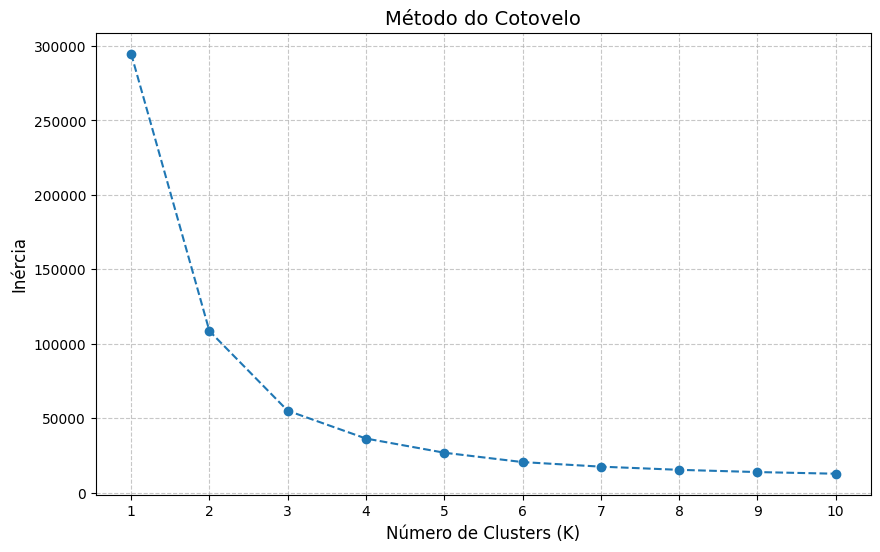

In [43]:
# Preparar dados
X_final, features = prepare_data(df)

# Calcular inércias
inertias = elbow_method(X_final)

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inércia', fontsize=12)
plt.title('Método do Cotovelo', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(range(1, 11))
plt.show()

#### 5.2 Método da Silhueta

Vamos testar outro método de encontrar o k, chamado de método da silhueta, a fim de confirmar a escolha de k, o que remove a arbitrariedade do método do cotovelo. Para tal, precisaremos usar a implementação do Kmeans da biblioteca sklearn para facilitar o fluxo. O score desse método mede o quão similar um objeto é ao seu próprio cluster, então quanto maior o score melhor.

In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

#Calcula o score para k de 2 até 10
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_final)
    silhouette_avg = silhouette_score(X_final, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"k = {k}: Silhouette Score = {silhouette_avg:.3f}")

k = 2: Silhouette Score = 0.511
k = 3: Silhouette Score = 0.491
k = 4: Silhouette Score = 0.444
k = 5: Silhouette Score = 0.410
k = 6: Silhouette Score = 0.407
k = 7: Silhouette Score = 0.375
k = 8: Silhouette Score = 0.347
k = 9: Silhouette Score = 0.320
k = 10: Silhouette Score = 0.295


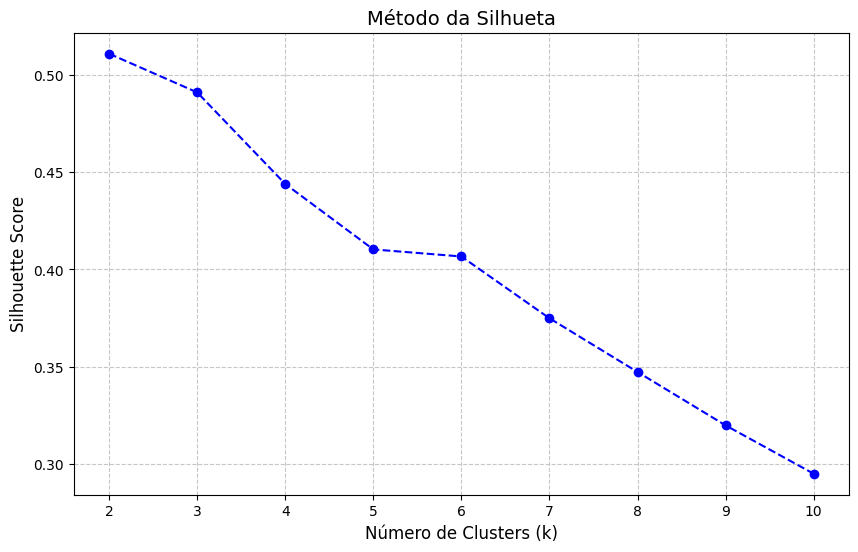

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Método da Silhueta', fontsize=14)
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Observamos que K = 2 é o melhor número de clusters, dado que seu score mostra que os objetos estão mais próximos de seus respectivos centróides.

### 6. Aplicando o K encontrado

#### 6.1 Distribuição dos clusters

In [46]:
#Roda kmeans com K=2
labels, centroids = k_means(X_final, k=2)

#Adicionar os clusters ao dataframe original
df['cluster'] = labels

#quantos alunos estão em cada cluster
df['cluster'].value_counts()

,count
cluster,
1,531
0,469


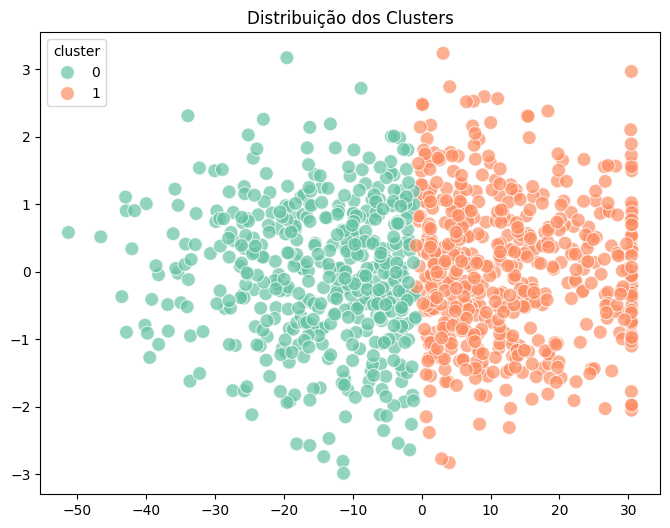

In [47]:
from sklearn.decomposition import PCA

# Reduzir a dimensionalidade para 2D com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_final)

#Plotar os dados com seus clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['cluster'], palette='Set2', s=100, alpha=0.7)
plt.title('Distribuição dos Clusters')
plt.show()

#### 6.2 Estatísticas de cada grupo

In [48]:
#Clusters
cluster_0 = df[df['cluster'] == 0]
cluster_1 = df[df['cluster'] == 1]

#Descrição geral de cada cluster
df.groupby('cluster').describe()

age                                                     \
         count       mean       std   min   25%   50%   75%   max   
cluster                                                             
0        469.0  20.511727  2.305320  17.0  19.0  21.0  22.0  24.0   
1        531.0  20.485876  2.312658  17.0  18.0  20.0  23.0  24.0   

        study_hours_per_day            ... mental_health_rating        \
                      count      mean  ...                  75%   max   
cluster                                ...                              
0                     469.0  2.530064  ...                  7.0  10.0   
1                     531.0  4.451036  ...                  9.0  10.0   

        exam_score                                                         
             count       mean        std   min    25%   50%    75%    max  
cluster                                                                    
0            469.0  55.105330  10.301126  18.4  48.70  57.4  63.60   68.7  
1            531.0  82.405085   9.681187  68.8  74.05  80.8  89.45  100.0  

[2 rows x 72 columns]

#### 6.2.1 Comparando as médias de variáveis numéricas

In [51]:
df.groupby('cluster').mean(numeric_only=True)


,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
cluster,,,,,,,,,
0,20.511727,2.530064,2.650959,1.977612,83.083795,6.306610,2.857143,4.586354,55.105330
1,20.485876,4.451036,2.377024,1.680226,85.057250,6.614501,3.205273,6.190207,82.405085


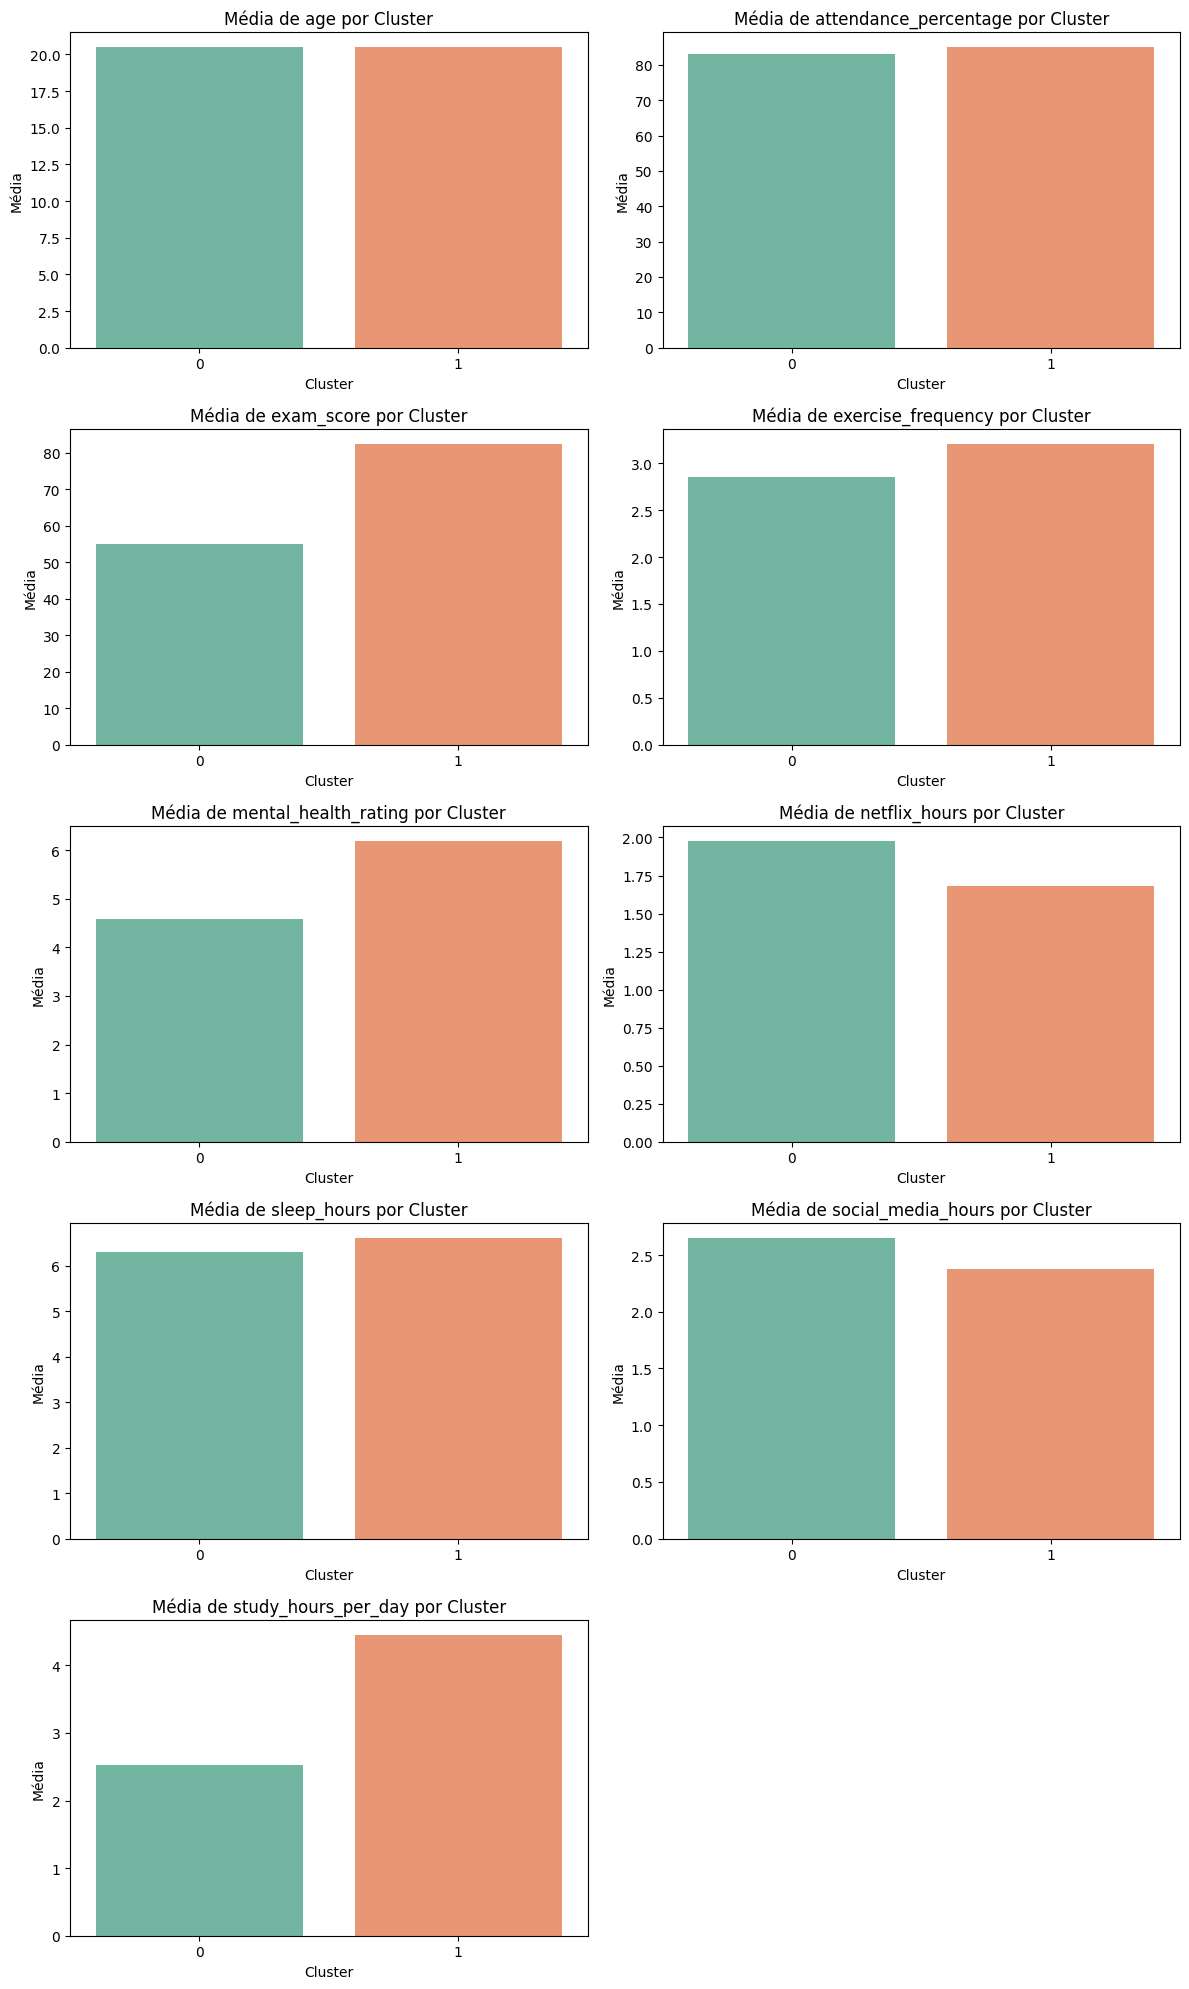

In [49]:
# Calcular as médias numéricas por cluster
cluster_means = df.groupby('cluster').mean(numeric_only=True)

# Transformar o índice em coluna para usar como 'hue'
cluster_means = cluster_means.reset_index()

# Número de variáveis numéricas
numeric_cols = cluster_means.columns.difference(['cluster'])
n_vars = len(numeric_cols)

# Criar subplots em múltiplas linhas
n_cols = 2
n_rows = (n_vars + 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

# Plot para as variáveis numéricas
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.barplot(data=cluster_means, x='cluster', y=col, hue='cluster', palette='Set2', legend=False)
    plt.title(f'Média de {col} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Média')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


#### 6.2.2 Comparando a proporção das variáveis categóricas

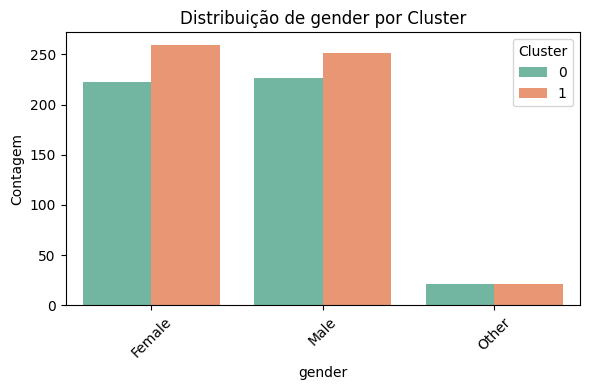

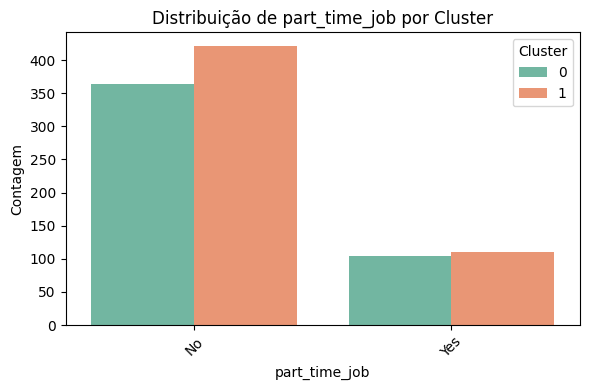

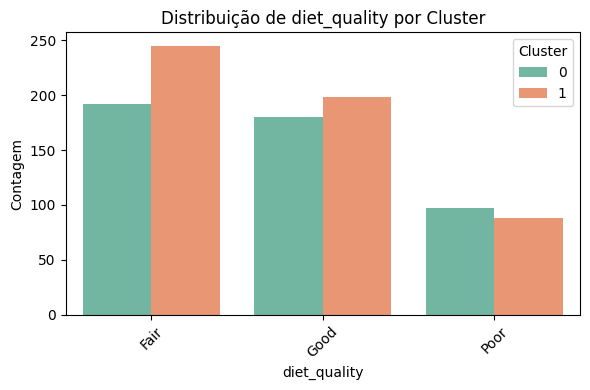

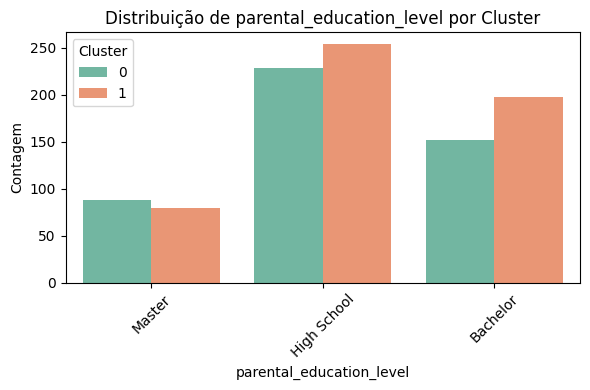

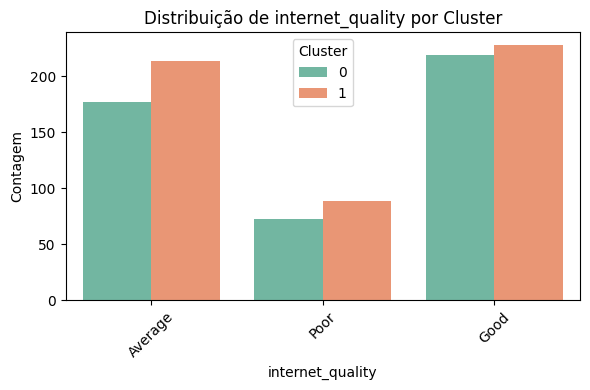

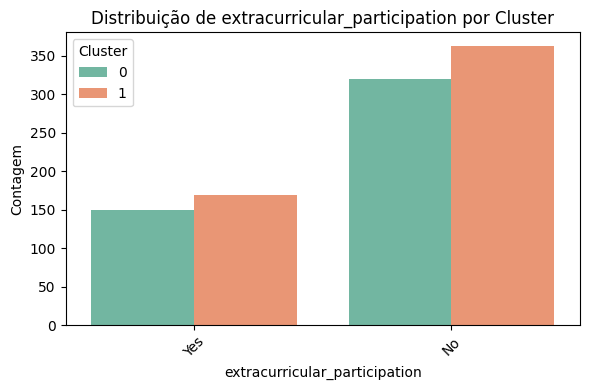

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='cluster', palette='Set2')
    plt.title(f'Distribuição de {col} por Cluster')
    plt.xlabel(col)
    plt.ylabel('Contagem')
    plt.legend(title='Cluster')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### 7. Reavaliação das hipóteses

Começando pelas variáveis numéricas, a variável de maior destaque é study_hours_per_day, em que o grupo 1 tem média muito superior (4.45 vs 2.53). Além disso, o grupo 1 é favorecido principalmente em mental_health_rating (6.19 vs 4.59), mas também em exercise_frequency (3.21 vs 2.86) sleep_hours (6.61 vs 6.31) e possui menos horas de netflix e social media, com (2.38 vs 2.65) e (1.68 vs 1.98) respectivamente. Esses fatores contribuem para que o grupo 1 apresente média de notas muito superior ao grupo 0, com 82.41 vs 55.11.    

Já nas variáveis categóricas, observamos que o grupo 1 (com maior nota) tem proporção maior em quase todas as métricas. Isso se dá principalmente ao fato de que esse grupo é o grupo majoritário no dataset, com 531 indivíduos vs os 469 do grupo 0 (com menor média). Dentre as diferenças de proporções observadas, as únicas que parecem ser estatísticamente significantes são diet_quality e part_time_job, em que o grupo 1 se destaca por ter dieta melhor e trabalhar menos. Acredito que esse grupo estar menos engajado com trabalhos de dedicação não exclusiva o faz ter mais tempo para estudar.

Dessa forma, reavaliamos as hipóteses novamente, concluindo que:

1) Confirmada. O cluster 1 tem maior frequência de exercícios, melhor saúde mental e notas significativamente mais altas. Porém grande parte dessa melhora de resultado provém da saúde mental, com os exercícios influindo menos que o esperado.

2) Parcialmente confirmada. Cluster 1 dorme um pouco mais e tem notas mais altas. A diferença é pequena, mas consistente com a hipótese inicial, o que indica que o sono é um fator complementar para o desempenho.

3)Confirmada. Cluster 0 (notas mais baixas) tem consumo ligeiramente maior de redes sociais e Netflix. Embora as diferenças não sejam drásticas, elas acompanham a tendência esperada.

4)Parcialmente confirmada. Observa-se que as horas de estudo são o fator decisivo para o desempenho, com diferenças óbvias nessa feature. Porém a presença nas aulas não acompanha esse aumento de desempenho, onde os 2 grupos tem presenças muito similares.